<a href="https://colab.research.google.com/github/Zaine-eng/Curso-Intro-Machine_Learning/blob/main/L02_knn_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **L02 - Knn em python**

Aulas ministradas pelo **Prof. Dr. Dalcimar Casanova** - pesquisador na UTFPR - Universidade Tecnológica Federal do Paraná.

Os passos de como fazer o Knn refletem os passos discutidos na aula e visualizado esse slide abaixo:

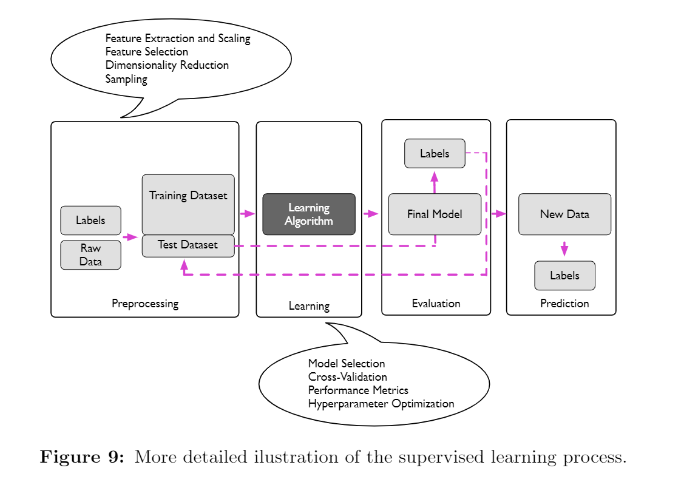

# **1- Importando bibliotecas**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [9]:
df_iris = pd.read_excel('/content/L02-knn-datas-íris.xlsx')
df_iris.tail() #nos mostra as 5 últimas linhas dos nossos dados.


,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


Precisamos separar uma variável x que guarda as características e y que guarda os rótulos. 

# **2 - Obtenha recursos em uma matriz NumPy**

Recentemente, bibliotecas de aprendizado de máquina, como scikit-learn, começaram a oferecer suporte a Pandas DataFrames. No entanto, tradicionalmente, é costume trabalhar com matrizes NumPy. Na verdade, os DataFrames são construídos em cima dos arrays NumPy, então os arrays NumPy são um pouco de nível inferior. Por falar nisso. você pode pensar em um array NumPy como um tensor, você pode ter escalares, vetores, matrizes, etc. representados como arrays NumPy.

Na próxima célula de código, estamos acessando o array NumPy que está embutido no DataFrame por meio do atributo .values. Mais especificamente, estamos atribuindo apenas as 2 colunas de recurso 'PetalLength[cm]', 'PetalWidth[cm]' a uma variável X. Aqui, X referencia o array NumPy de forma 150x2 (você pode pensar nisso como uma matriz).

In [11]:
X = df_iris[['PetalLength[cm]','PetalWidth[cm]']].values
print(X.shape) # devolve uma tupla com o número de linhas e de colunas.

(150, 2)


Como podemos visualizar o que temos dentro de uma do X, faremos da seguinte maneira, veja que o resultado vai nos dá uma matriz.

Lembre-se se precisamos de matrizes, devemos converter para array, ou seja, vamos utilizar a biblioteca Numpy.

In [13]:
X[:5, :]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

Criando uma coluna extra no nosso dataframe Iris para podemos  pegar a classe, para isso, devemos enumera-la sendo: Iris-setosa -0, Iris-versicolor-1 e Iris-virginica-2.

# **3 - Obter rótulos de classe em um array NumPy**

Da mesma forma que atribuir os recursos a uma nova variável X, agora estamos atribuindo os rótulos da classe a uma nova variável, que chamaremos de y. No entanto, antes de fazermos isso, vamos mapear os rótulos de classe de uma representação de string em um formato int (inteiro). Para isso, adicionamos uma nova coluna ClassLabel ao data frame:

In [15]:
label_dict = {'Iris-setosa': 0,
               'Iris-versicolor': 1,
               'Iris-virginica':2}
df_iris['ClassLabel'] = df_iris['Species'].map(label_dict) # em vez de usar um loop for , a função map() fornece uma maneira de aplicar uma função a todos os itens em um iterável.
df_iris.tail()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species,ClassLabel
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


Agora vamos adicionar ao Y os valores criados na nossa nova coluna 'ClassLabel', pois ela é o nosso retorno.

In [17]:
y = df_iris['ClassLabel'].values #
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Resumo do que já foi feito: 


*   Temos nossos dados brutos = matriz X;
*   Temos nosso Label y; 






A próxima tarefa é dividir o conjunto de dados em um conjunto de treinamento e um conjunto de teste. Observe que as primeiras 10 entradas são todas zeros. Isso ocorre porque o conjunto de dados ainda não foi embaralhado. Assim, em Iris, o vetor y  consiste em 50 0's, 50 1's e 50 2's (nessa ordem).

Seria, portanto, um pouco problemático se atribuíssemos as primeiras 100 entradas a um conjunto de treinamento e as 50 últimas entradas ao conjunto de teste. Você pode ver por quê?

# **4 - Embaralhe o conjunto de dados e crie subconjuntos de treinamento e teste**

Para dividir o conjunto de dados em um conjunto de treinamento e um conjunto de teste, vamos embaralhar o conjunto de dados primeiro. Para fins de ilustração, faremos isso em várias etapas.

Na primeira etapa, criamos um array de índice do nosso conjunto de dados:

In [19]:
indices = np.arange(y.shape[0])
indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

Em seguida, embaralhamos esse array de índice. Observe que usamos uma semente aleatória para que outras pessoas possam reproduzir os resultados. Isso significa que, se outra pessoa usar esse código em um computador diferente, a pessoa receberá exatamente a mesma ordem aleatória.

Permutando esses indices temos:

In [21]:
from numpy.random.mtrand import shuffle
rnd = np.random.RandomState(123)
shuffled_indices = rnd.permutation(indices)
shuffled_indices

array([ 72, 112, 132,  88,  37, 138,  87,  42,   8,  90, 141,  33,  59,
       116, 135, 104,  36,  13,  63,  45,  28, 133,  24, 127,  46,  20,
        31, 121, 117,   4, 130, 119,  29,   0,  62,  93, 131,   5,  16,
        82,  60,  35, 143, 145, 142, 114, 136,  53,  19,  38, 110,  23,
         9,  86,  91,  89,  79, 101,  65, 115,  41, 124,  95,  21,  11,
       103,  74, 122, 118,  44,  51,  81, 149,  12, 129,  56,  50,  25,
       128, 146,  43,   1,  71,  54, 100,  14,   6,  80,  26,  70, 139,
        30, 108,  15,  18,  77,  22,  10,  58, 107,  75,  64,  69,   3,
        40,  76, 134,  34,  27,  94,  85,  97, 102,  52,  92,  99, 105,
         7,  48,  61, 120, 137, 125, 147,  39,  84,   2,  67,  55,  49,
        68, 140,  78, 144, 111,  32,  73,  47, 148, 113,  96,  57, 123,
       106,  83,  17,  98,  66, 126, 109])

In [22]:
X_shuffled = X[shuffled_indices]
y_shuffled = y[shuffled_indices]

Agora vamos separar as primeiras 105 amostras para treinamento e o restante para teste.

In [51]:
X_train = X_shuffled[:105]
y_train = y_shuffled[:105]
X_test = X_shuffled[105:]
y_test = y_shuffled[105:]

Pronto, separamos nosso dado em treinamento e teste. 

# **5 - Usando a Biblioteca Scikit**

Observe que passamos por muitas etapas para carregar o conjunto de dados e dividi-lo em subconjuntos de treinamento e teste. Fizemos isso para que você desenvolva uma intuição para o procedimento. No entanto, também existem funções convenientes no scikit-learn que nos permitem fazer exatamente as mesmas coisas em muito menos linhas de código. Ou seja, o código a seguir carregará o conjunto de dados da íris e o dividirá em 30% de dados de teste e 70% de dados de treinamento:

In [52]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris = load_iris()
X, y = iris.data[:, 2:], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True)

In [53]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 2)
(105,)
(45, 2)
(45,)


# **6 - Plotando o dataset**

Como você provavelmente já aprendeu em outras aulas de estatística, é sempre uma boa ideia visualizar seus dados antes de fazer outras análises. Nesse caso, temos sorte que nosso conjunto de dados é bidimensional, então podemos plotar o conjunto de treinamento usando um gráfico de dispersão 2D:

(P: por que apenas plotamos o treinamento, não o conjunto de teste?)

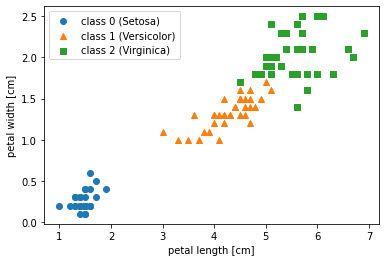

In [54]:
# scatter - plotagem de um gráfico de dispersão
plt.scatter(X_train[y_train == 0, 0],
            X_train[y_train == 0, 1],
            marker = 'o',
            label = 'class 0 (Setosa)') 

plt.scatter(X_train[y_train == 1, 0],
            X_train[y_train == 1, 1],
            marker = '^',
            label = 'class 1 (Versicolor)') 

plt.scatter(X_train[y_train == 2, 0],
            X_train[y_train == 2, 1],
            marker = 's',
            label = 'class 2 (Virginica)') 

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')

plt.show()

# **7 - Ajustar o modelo k-vizinho mais próximo**


Em seguida, vamos usar a classe KNeighborsClassifier do scikit-learn e instanciar um novo objeto KNN, que chamamos de knn_model. Em seguida, "ajustamos" este modelo ao conjunto de dados de treinamento:

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# **8 - Use o modelo kNN para fazer previsões**


Depois de "ajustar" o modelo KNN, agora podemos fazer previsões em novos pontos de dados que o modelo não viu antes. O conjunto de teste representa esses pontos de dados. É claro que também temos rótulos para o conjunto de teste, mas só usamos esses rótulos para avaliar o modelo, ou seja, comparamos as previsões com os rótulos verdadeiros no conjunto de teste para descobrir a qualidade do modelo:

In [56]:
y_pred = knn_model.predict(X_test)

In [57]:
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100
print('Test set accuracy: %.2f%%' % accuracy)

Test set accuracy: 95.56%


# **9 - Visualize o Limite da Decisão**

Normalmente, em aprendizado de máquina, trabalhamos com conjuntos de dados que possuem mais de 2 variáveis ​​de recursos. Para fins educacionais, no entanto, escolhemos um conjunto de dados muito simples que consiste em apenas dois recursos aqui (o comprimento da pétala e a largura da pétala das flores de íris). Se tivermos apenas dois recursos, podemos visualizar facilmente o limite de decisão do modelo - aqui, usaremos uma função de conveniência que implementei na biblioteca MLxtend:

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


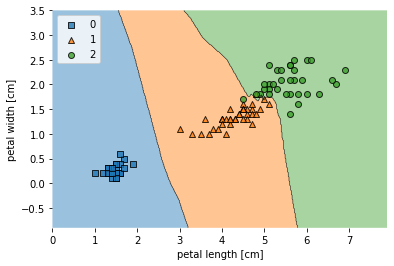

In [58]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train, knn_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend (loc = 'upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


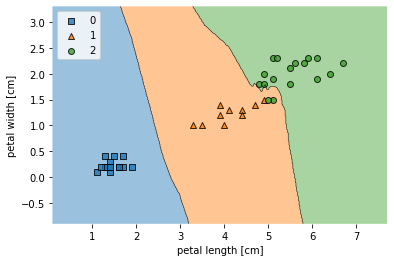

In [59]:
plot_decision_regions(X_test, y_test, knn_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()